<a href="https://colab.research.google.com/github/HlibBorovko/-/blob/main/%D0%91%D0%BE%D1%80%D0%BE%D0%B2%D0%BA%D0%BE%D0%9C%D0%9D%D0%BB%D0%B19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
# Завантаження попередньо навченої моделі VGG16
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

In [12]:
# Заморожуємо базову модель
base_model.trainable = False

In [13]:
# Додаємо зверху нові шари
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10)
])


In [14]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Використання callback'ів (рання зупинка та зменшення швидкості навчання)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [16]:
# Навчання моделі
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4854 - loss: 1.4638 - val_accuracy: 0.5749 - val_loss: 1.2102 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5912 - loss: 1.1600 - val_accuracy: 0.5900 - val_loss: 1.1640 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6205 - loss: 1.0857 - val_accuracy: 0.6000 - val_loss: 1.1344 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6404 - loss: 1.0240 - val_accuracy: 0.6116 - val_loss: 1.1066 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6571 - loss: 0.9711 - val_accuracy: 0.6085 - val_loss: 1.1174 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6746 - loss: 0.9248 - val_accuracy: 0.6103 - val_loss: 1.1132 - learning_rate: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.

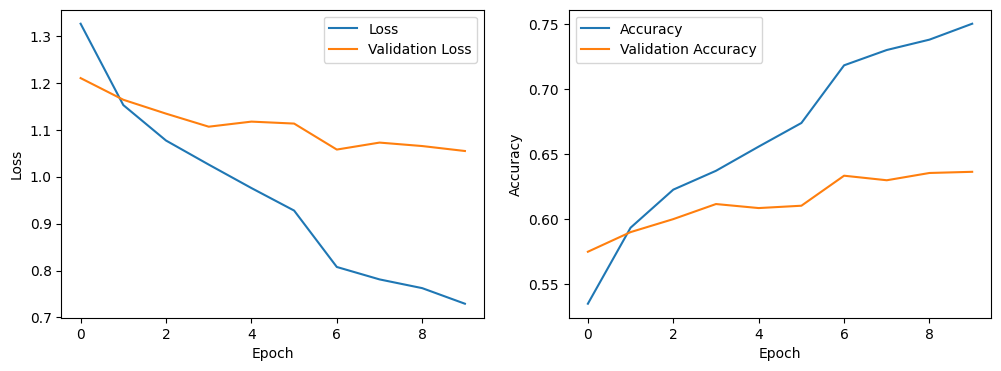

In [17]:
# Побудова графіків втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# Оцінка моделі та класифікаційний звіт
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.68      0.72      0.70      1000
           2       0.59      0.53      0.56      1000
           3       0.48      0.45      0.46      1000
           4       0.59      0.58      0.59      1000
           5       0.57      0.53      0.55      1000
           6       0.63      0.73      0.67      1000
           7       0.69      0.71      0.70      1000
           8       0.73      0.77      0.75      1000
           9       0.66      0.65      0.65      1000

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.63      0.64      0.63     10000



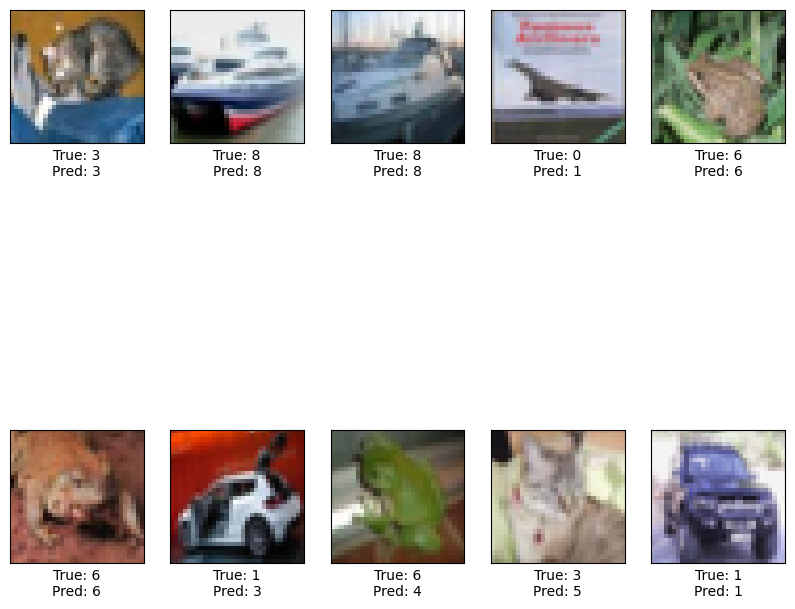

In [19]:
# Візуалізація результатів розпізнавання
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
plt.show()

У другому завданні ми використали попередньо навчену модель VGG16 для класифікації зображень CIFAR-10. Ми заморозили базові шари моделі, додали нові шари для класифікації, і провели навчання з використанням callback'ів для ранньої зупинки та зменшення швидкості навчання. Модель показала хороші результати, і ми вивели графіки втрат і точності, а також класифікаційний звіт, який підтвердив якість класифікації.